# Starter EDA - NYC Daily Inmates

Make the necessary library imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rc['font.size'] = 9.0
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

### Read data & get a gist of the kind of data

In [2]:
data = pd.read_csv("assets/daily-inmates-in-custody.csv")
data.sample(5)

,INMATEID,ADMITTED_DT,DISCHARGED_DT,CUSTODY_LEVEL,BRADH,RACE,GENDER,AGE,INMATE_STATUS_CODE,SEALED,SRG_FLG,TOP_CHARGE,INFRACTION
2764,20190493,2018-07-30T16:40:00.000,NaN,MAX,Y,B,M,19.0,DE,N,Y,125.25,Y
1717,20189288,2017-11-16T23:45:04.000,NaN,MAX,N,W,M,41.0,SSR,N,N,NaN,Y
2974,20202638,2019-03-06T21:28:15.000,NaN,MIN,N,W,M,51.0,DE,N,N,220.77,N
5556,20185912,2019-06-07T00:54:09.000,NaN,MAX,Y,B,M,39.0,DE,N,N,160.15,Y
5849,77014,2019-11-18T15:40:00.000,NaN,MED,N,B,M,34.0,DPV,N,Y,NaN,N


---

### Preliminary Inferences

1. Data is largely categorical nature with only two features - **Age** & **Top Charge** being numeric.

2. **DISCHARGED_DT** has no entries & therefore can safely be ignored

3. Points of interests can be - **Gender** & **Race** around which basic visualizations can be centered

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INMATEID            6818 non-null   int64  
 1   ADMITTED_DT         6818 non-null   object 
 2   DISCHARGED_DT       0 non-null      float64
 3   CUSTODY_LEVEL       6703 non-null   object 
 4   BRADH               6818 non-null   object 
 5   RACE                6789 non-null   object 
 6   GENDER              6789 non-null   object 
 7   AGE                 6805 non-null   float64
 8   INMATE_STATUS_CODE  6818 non-null   object 
 9   SEALED              6818 non-null   object 
 10  SRG_FLG             6818 non-null   object 
 11  TOP_CHARGE          5795 non-null   object 
 12  INFRACTION          6818 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 692.6+ KB


---

### Let us begin by plotting a distribution of Ages

This is quite expected as most of detainees have ages in the range of 20-40 years.

Text(0, 0.5, 'Count')

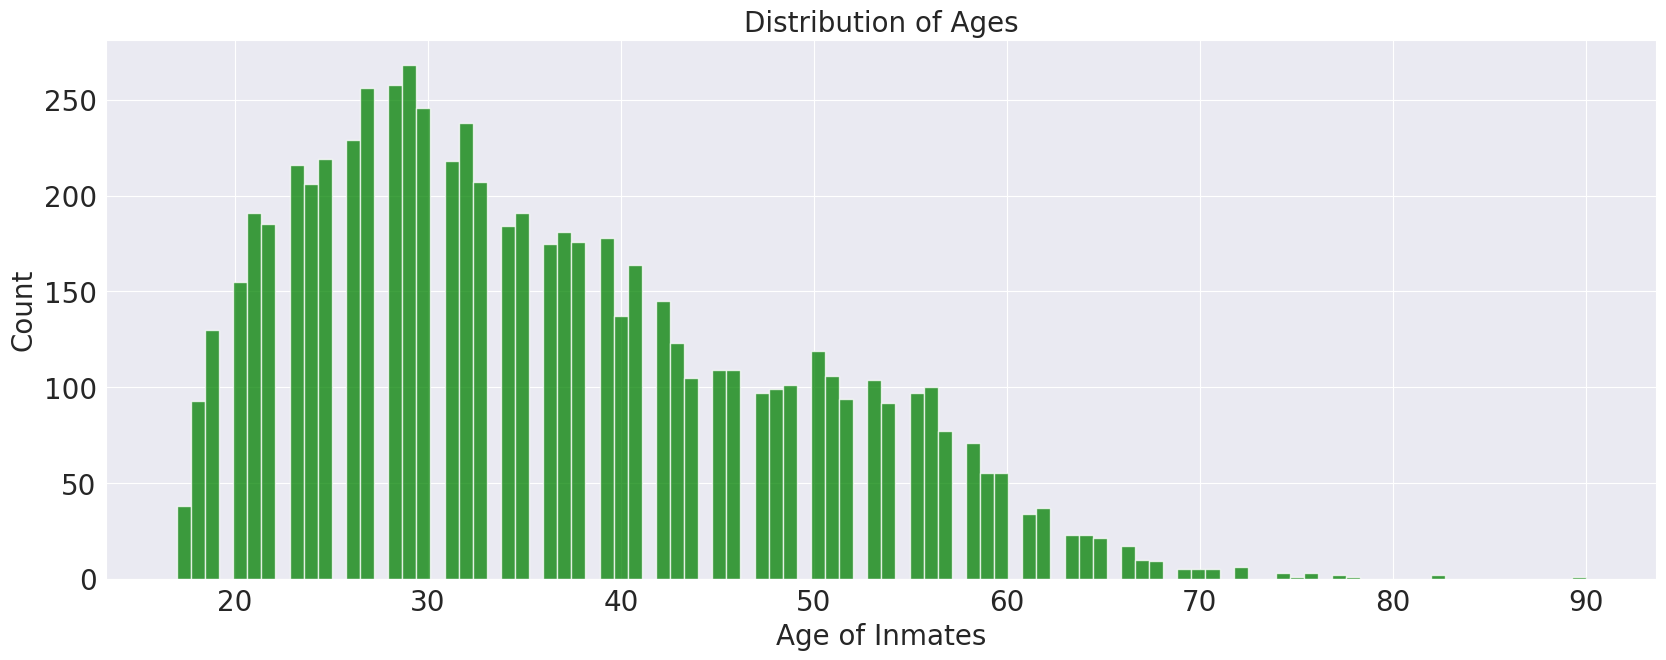

In [4]:
plt.figure(figsize=(20,7))
h = plt.hist(pd.to_numeric(data.AGE).dropna(), facecolor='g', alpha=0.75, bins=100)
plt.title("Distribution of Ages")
plt.xlabel("Age of Inmates")
plt.ylabel("Count")

In [5]:
def my_autopct(pct):
    return ('%.2f' % pct) if pct > 3 else ''
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

## Proportion of Detainees by GENDER & RACE

Text(0.5, 1.0, 'RACE')

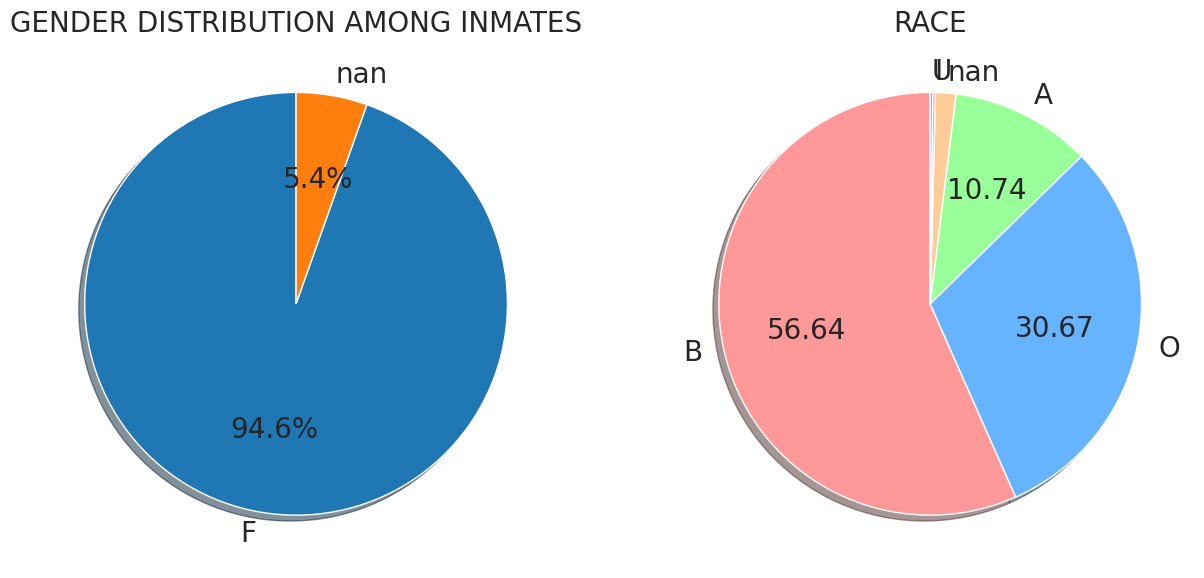

In [6]:
f, ax = plt.subplots(1,2, figsize=(15,7))
#sns.countplot(x='RACE', hue='GENDER', data=data, ax=ax[1][1], palette="Set2")
pie = ax[0].pie(list(data['GENDER'].value_counts()), 
                   labels=list(data.GENDER.unique())[1:],
                  autopct='%1.1f%%', shadow=True, startangle=90)
pie = ax[1].pie(list(data['RACE'].value_counts()), 
                   labels=list(data.RACE.unique())[1:],
                  autopct=my_autopct, shadow=True, startangle=90, colors=colors)
ax[0].set_title("GENDER DISTRIBUTION AMONG INMATES")
ax[1].set_title("RACE")
#ax[1][1].set_title("RACE - GENDER DISTRIBUTION")

### Individual proportions of RACE across the two GENDERS

Text(0, 0.5, 'Number of Inmates')

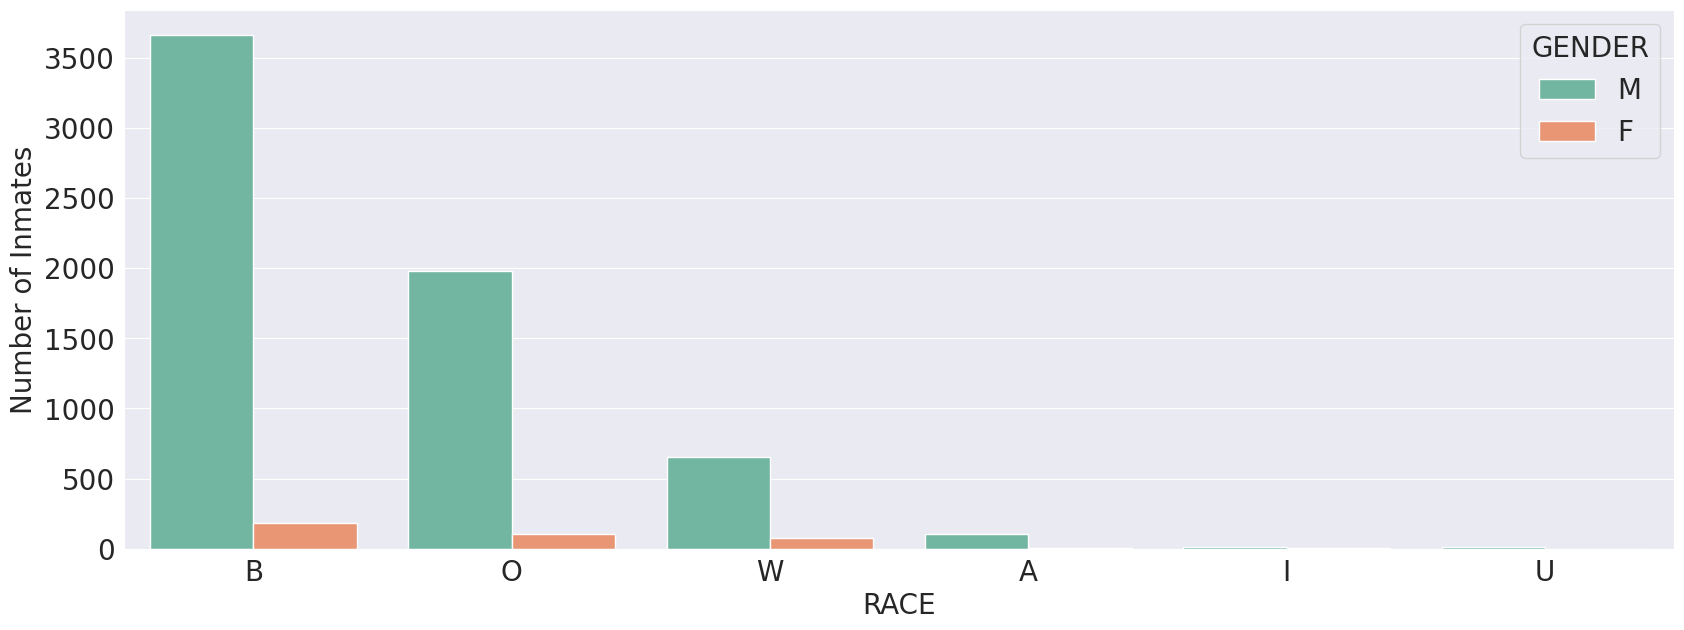

In [7]:
plt.figure(figsize=(20,7))
sns.countplot(x='RACE', hue='GENDER', data=data, palette="Set2",
             order = data['RACE'].value_counts().index)
plt.ylabel("Number of Inmates")

Text(0, 0.5, 'Number of Inmates')

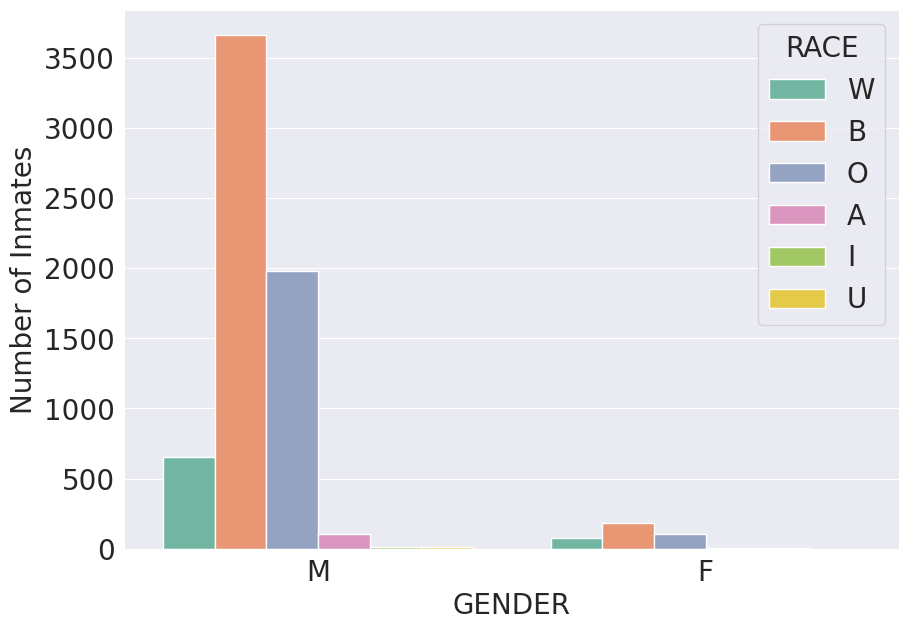

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(x='GENDER', hue='RACE', data=data, palette="Set2",
             order = data['GENDER'].value_counts().index)
plt.ylabel("Number of Inmates")

## Under Mental Observation

A significant proportion of inmates are under Mental Observation (> 40%)

Text(0.5, 0, 'Inmates under Mental Observation? Y-Yes, N-No')

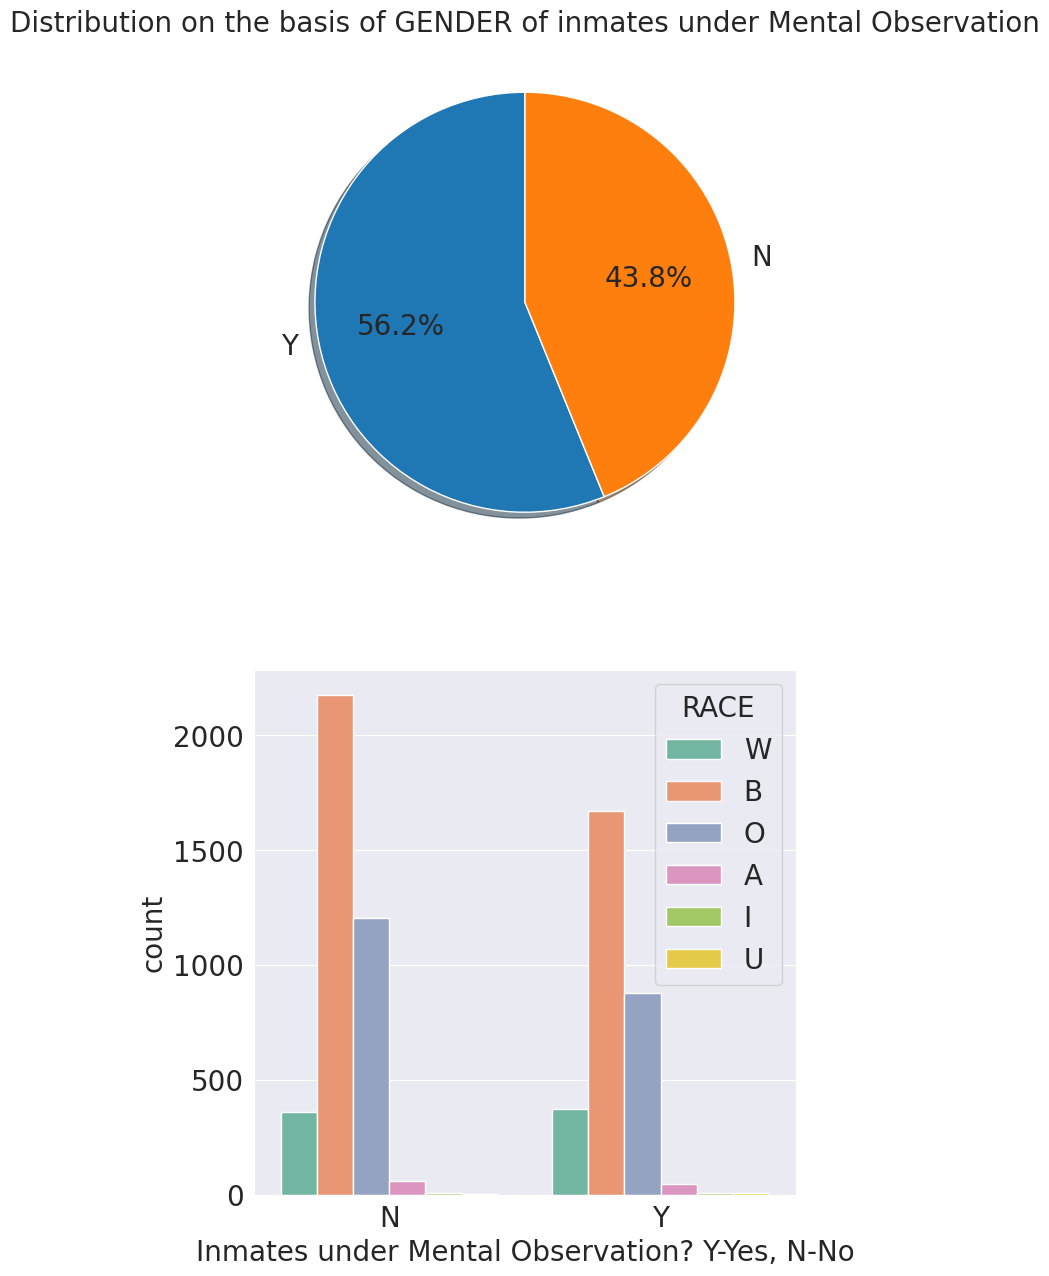

In [9]:
f, ax = plt.subplots(2,1, figsize=(7,15))
#sns.countplot(x='RACE', hue='GENDER', data=data, ax=ax[1][1], palette="Set2")
pie = ax[0].pie(list(data['BRADH'].value_counts()), 
                   labels=list(data.BRADH.unique()),
                  autopct='%1.1f%%', shadow=True, startangle=90)
sns.countplot(x='BRADH', hue='RACE', data=data, palette="Set2",
             order = data['BRADH'].value_counts().index, ax=ax[1])
ax[0].set_title("Distribution on the basis of GENDER of inmates under Mental Observation")
ax[1].set_xlabel("Inmates under Mental Observation? Y-Yes, N-No")
#ax[1].set_title("RACE")

Text(0.5, 1.0, 'Member of the Gang?')

<Figure size 700x700 with 0 Axes>

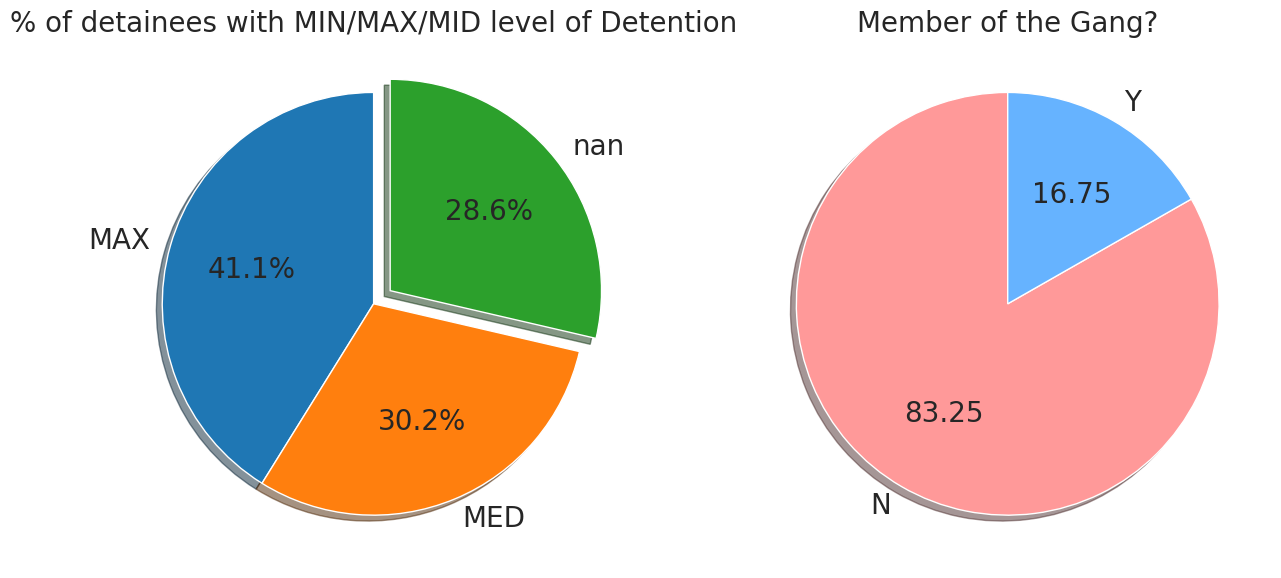

In [10]:
plt.figure(figsize=(7,7))
explode = (0,0,0.1)
f, ax = plt.subplots(1,2, figsize=(15,7))
#sns.countplot(x='RACE', hue='GENDER', data=data, ax=ax[1][1], palette="Set2")
pie = ax[0].pie(list(data['CUSTODY_LEVEL'].value_counts()), 
                   labels=list(data.CUSTODY_LEVEL.unique())[1:],
                  autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)
pie = ax[1].pie(list(data.SRG_FLG.value_counts()), 
                   labels=list(data.SRG_FLG.unique()),
                  autopct=my_autopct, shadow=True, startangle=90, colors=colors)
ax[0].set_title("% of detainees with MIN/MAX/MID level of Detention")
ax[1].set_title("Member of the Gang?")

## Gang Affiliations

Text(0.5, 0, 'Gang Affiliations? Y-Yes, N-No')

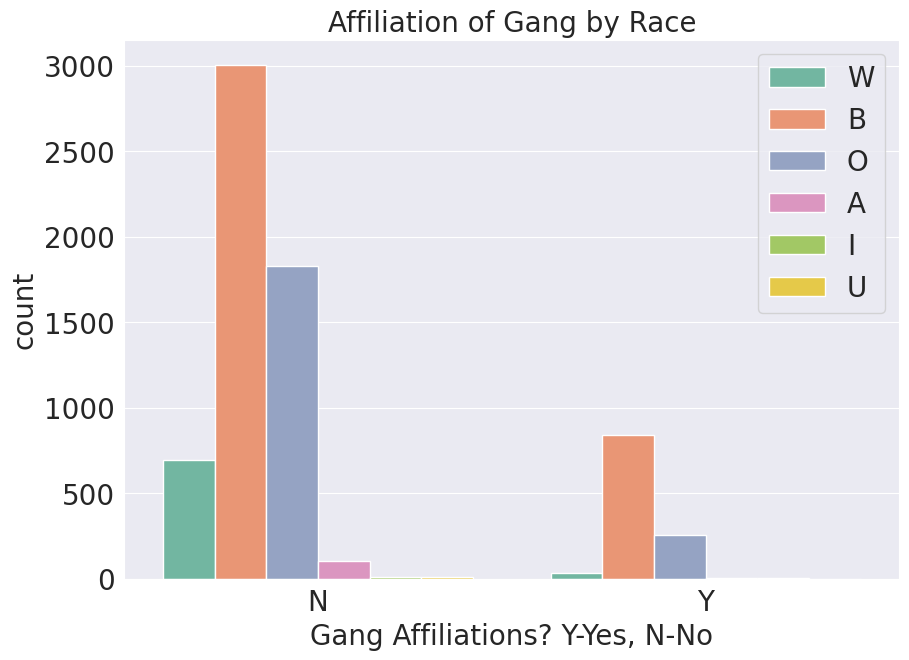

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(x='SRG_FLG', hue='RACE', data=data, palette="Set2",
             order = data['SRG_FLG'].value_counts().index)
plt.legend(loc="upper right")
plt.title("Affiliation of Gang by Race")
plt.xlabel("Gang Affiliations? Y-Yes, N-No")